# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Diva Putra Almeyda]
- **Email:** [divaalmeida99@gmail.com]
- **ID Dicoding:** [mintopico]

=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda yang paling banyak dan paling sedikit?
- Apakah ada perbedaan jumlah penyewa sepeda ketika hari libur dan tidak?
- Bagaimana trend penyewaan sepeda dari tahun 2011 - 2012 per bulannya?
- Bagaimana pengaruh situasi cuaca (weathersit) terhadap jumlah penyewa sepeda baik yang terdaftar maupun tidak?
- Berapa jumlah penyewa yang sudah menjadi member (registered) dan berapa yang belum (casual)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

* Load datasets

In [2]:
# load day dataset
day_df = pd.read_csv('data/day.csv')
# load hour dataset
hour_df = pd.read_csv('data/hour.csv')

day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [3]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [4]:
del hour_df

**Notes:**
- Pertanyaan Bisnis yang saya susun hanya memerlukan dataset day.csv, karena data yang ada pada dataset tersebut sudah dapat menjawab pertanyaan-pertanyaan saya, sedangkan data rincian sewa sepeda per jam tidak digunakan. Oleh karena itu, saya hanya akan menggunakan dataset day.csv

### Assessing Data

In [5]:
# Cek tipe data dan missing value day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Cek duplikasi data
print('Jumlah data duplikat:', day_df.duplicated().sum())

Jumlah data duplikat: 0


In [7]:
# Cek statistik data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Notes:**
- Tipe data kolom **dteday** perlu diubah menjadi **datetime**
- Tidak ada **missing value** & **data duplikat** pada dataset

In [8]:
# Transformasi data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### Cleaning Data

Perbaiki nama kolom agar lebih mudah dipahami

In [9]:
day_df.rename(columns={
    'instan': 'instant',
    'dteday': 'date',
    'season': 'season',
    'yr' : 'year',
    'mnth': 'month',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_workingday',
    'weathersit': 'weather_situation',
    'temp': 'temperature',
    'atemp': 'feels_temperature',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'casual': 'casual',
    'registered': 'registered',
    'cnt': 'total_rented'

} , inplace=True)

day_df.head(3)

,instant,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_situation,temperature,feels_temperature,humidity,wind_speed,casual,registered,total_rented
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


Mengubah data angka menjadi keterangan sesuai pada karakterisktik dataset day.csv untuk mempermudah memahami dataset

In [10]:
# Ubah data 'season'
day_df['season'] = day_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Ubah data 'year'
day_df['year'] = day_df['year'].map({
    0: 2011,
    1: 2012
})

# Ubah data 'month'
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Juni', 'Juli', 'Agust', 'Sep', 'Okt', 'Nov', 'Des']
day_df['month'] = day_df['month'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agust',
    9: 'Sep',
    10: 'Okt',
    11: 'Nov',
    12: 'Des'
})

# Ubah data 'day_of_week'
day_df['day_of_week'] = day_df['day_of_week'].map({
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
})

# Ubah data 'weather_situation'
day_df['weather_situation'] = day_df['weather_situation'].map({
    1: 'Clear / Few clouds',
    2: 'Mist / Cloudy',
    3: 'Light Rain / Snow',
    4: 'Heavy Rain / Snow'
})

In [11]:
day_df.head(3)

,instant,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_situation,temperature,feels_temperature,humidity,wind_speed,casual,registered,total_rented
0,1,2011-01-01,Spring,2011,Jan,0,Saturday,0,Mist / Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sunday,0,Mist / Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Monday,1,Clear / Few clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [12]:
# Ubah tipe data
day_df['season'] = day_df.season.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['day_of_week'] = day_df.day_of_week.astype('category')
day_df['weather_situation'] = day_df.weather_situation.astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date               731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    int64         
 4   month              731 non-null    category      
 5   is_holiday         731 non-null    int64         
 6   day_of_week        731 non-null    category      
 7   is_workingday      731 non-null    int64         
 8   weather_situation  731 non-null    category      
 9   temperature        731 non-null    float64       
 10  feels_temperature  731 non-null    float64       
 11  humidity           731 non-null    float64       
 12  wind_speed         731 non-null    float64       
 13  casual             731 non-null    int64         
 14  registered

#### Seleksi kolom yang digunakan untuk menjawab **Pertanyaan Bisnis**

**Kolom yang tidak digunakan:**
- **day_of_week**: keterangan hari tidak akan menjawab pertanyaan bisnis
- **is_workingday**: tidak digunakan karena sudah diwakili oleh kolom is_holiday
- **temperature**, **feels_ temperature**, **humidity**, **wind_speed**: tidak bisa menjawab pertanyaan bisnis

In [13]:
bike_rent_df = day_df[['instant', 'date', 'season', 'year', 'month', 'is_holiday', 'weather_situation', 'casual', 'registered', 'total_rented']]

bike_rent_df.head(3)

,instant,date,season,year,month,is_holiday,weather_situation,casual,registered,total_rented
0,1,2011-01-01,Spring,2011,Jan,0,Mist / Cloudy,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Mist / Cloudy,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Clear / Few clouds,120,1229,1349


## Exploratory Data Analysis (EDA)

### Explore "rent_bike_df"

#### 1. Rangkuman Statistik Data

In [14]:
day_df.describe(include='all')

,instant,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_situation,temperature,feels_temperature,humidity,wind_speed,casual,registered,total_rented
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Agust,NaN,Monday,NaN,Clear / Few clouds,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### 2. Distribusi data - Boxplot

In [17]:
import warnings

# Mengabaikan FutureWarning dan UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

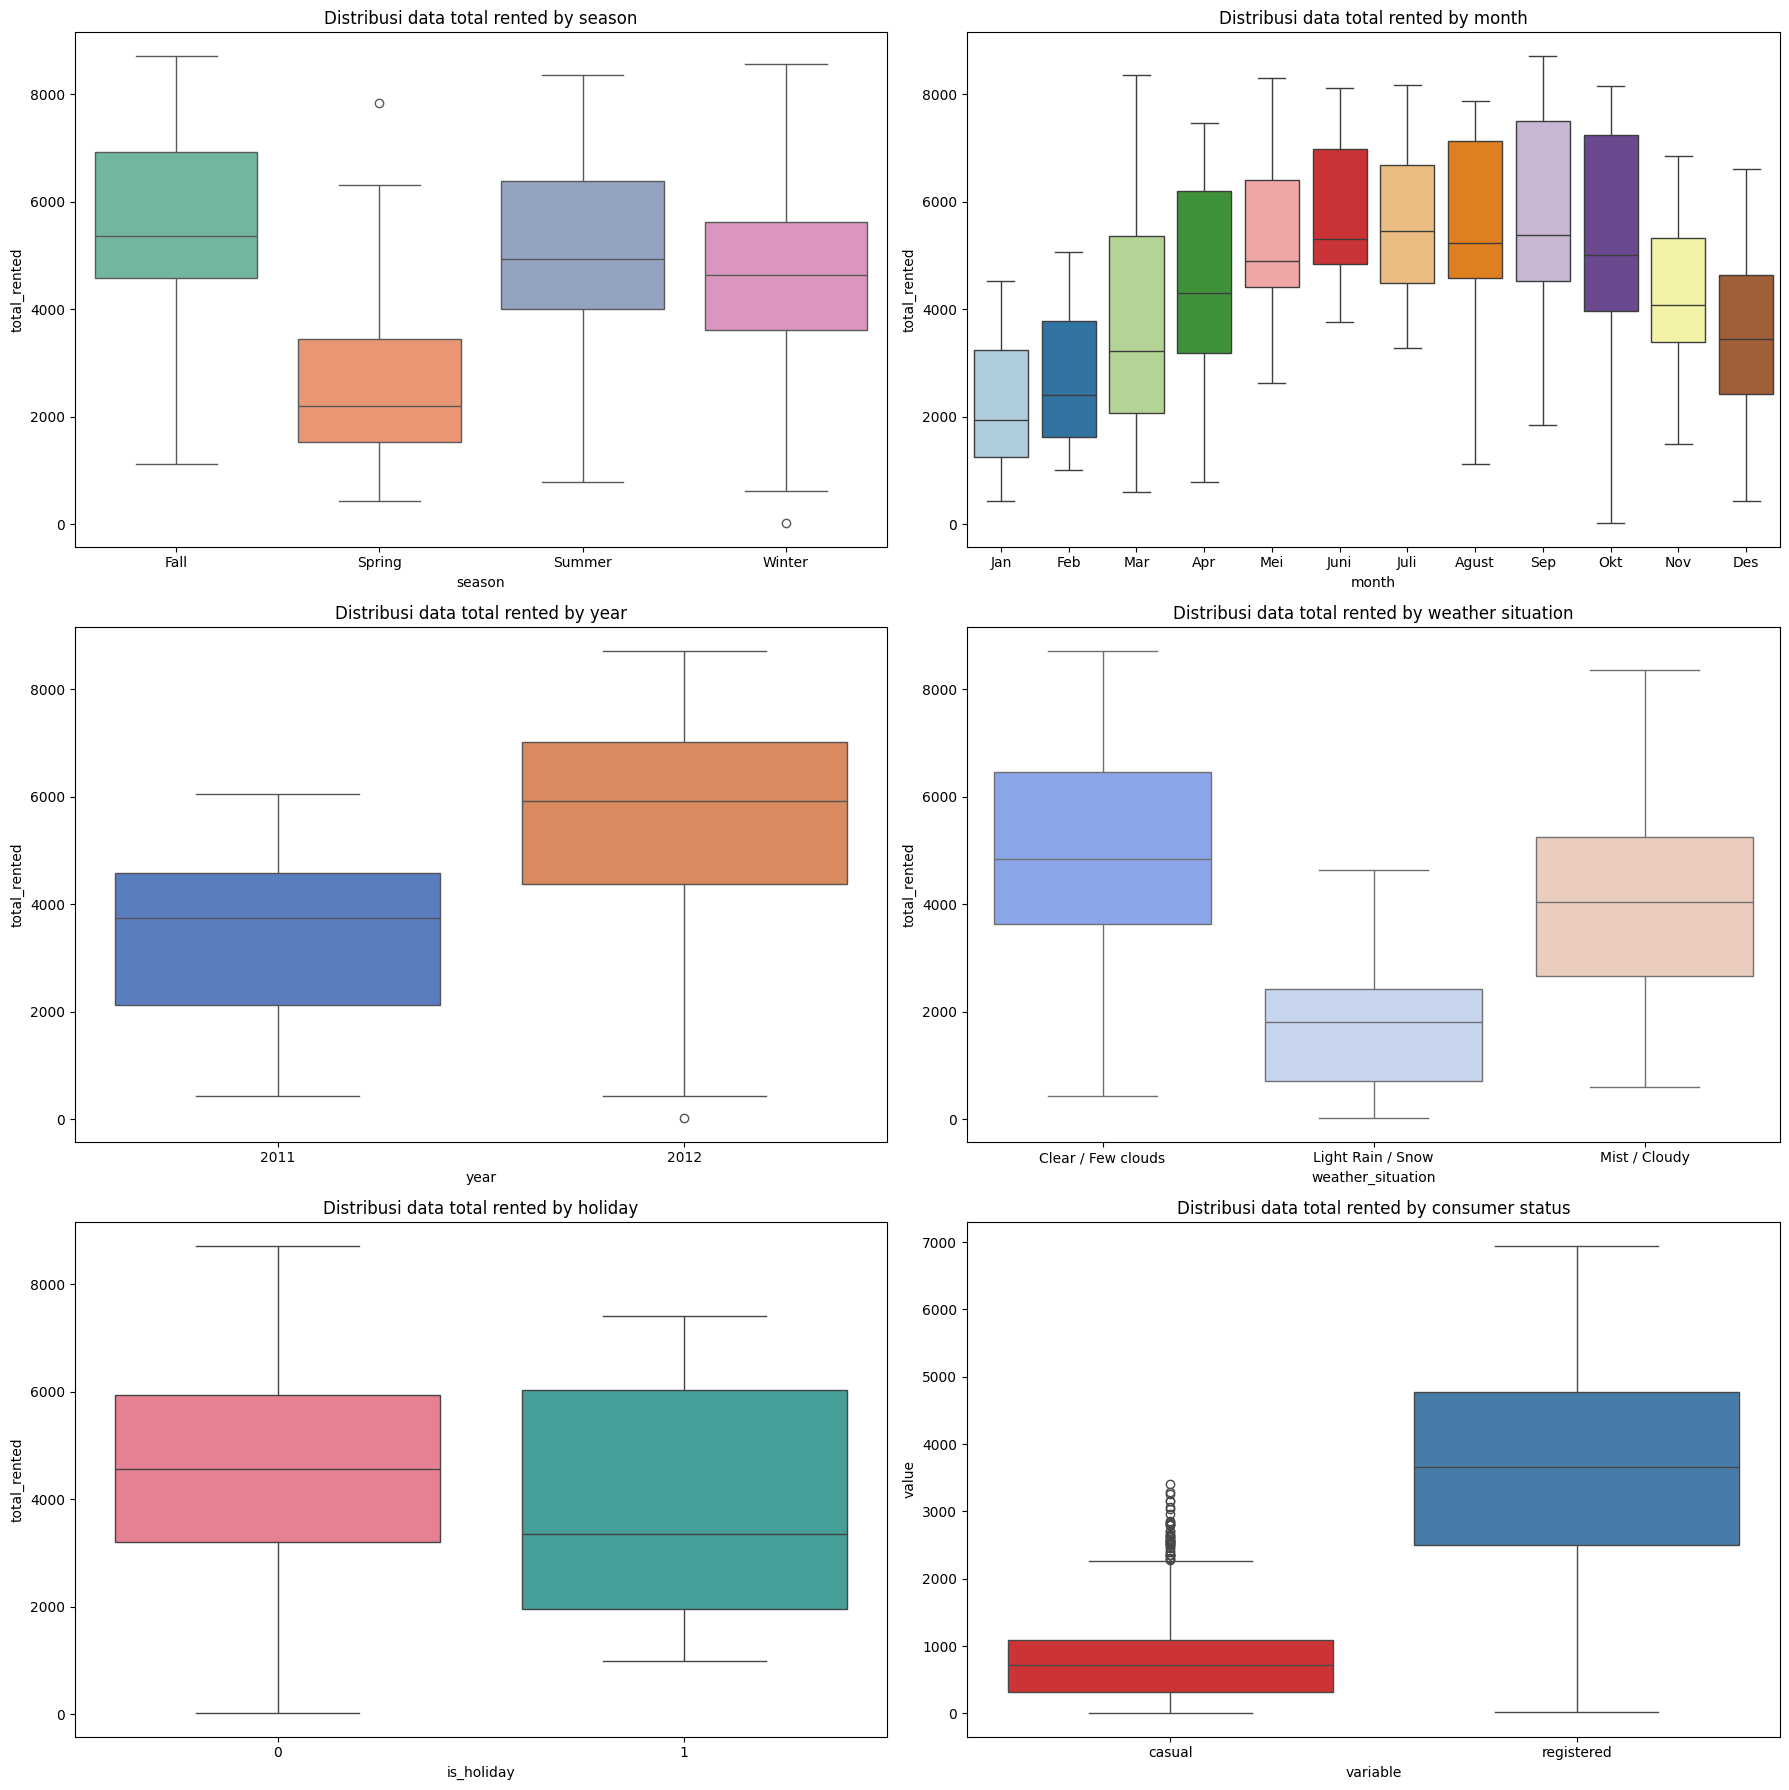

In [18]:
# Setup figure size and subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))  # 3 rows, 2 columns

# Color palette
season_palette = sns.color_palette("Set2")
month_palette = sns.color_palette("Paired", 12)
year_palette = sns.color_palette("muted", 2)
weather_palette = sns.color_palette("coolwarm", 4)
holiday_palette = sns.color_palette("husl", 2)
consumer_palette = sns.color_palette("Set1", 2)

# Distribusi data by season
sns.boxplot(data=bike_rent_df, x='season', y='total_rented', ax=axes[0, 0], palette=season_palette)
axes[0, 0].set_title('Distribusi data total rented by season')

# Distribusi data by month
bike_rent_df['month'] = pd.Categorical(bike_rent_df['month'], categories=month_order, ordered=True)
sns.boxplot(data=bike_rent_df, x='month', y='total_rented', ax=axes[0, 1], palette=month_palette)
axes[0, 1].set_title('Distribusi data total rented by month')

# Distribusi data by year
sns.boxplot(data=bike_rent_df, x='year', y='total_rented', ax=axes[1, 0], palette=year_palette)
axes[1, 0].set_title('Distribusi data total rented by year')

# Distribusi data by weather_situation
sns.boxplot(data=bike_rent_df, x='weather_situation', y='total_rented', ax=axes[1, 1], palette=weather_palette)
axes[1, 1].set_title('Distribusi data total rented by weather situation')

# Distribusi data by holiday
sns.boxplot(data=bike_rent_df, x='is_holiday', y='total_rented', ax=axes[2, 0], palette=holiday_palette)
axes[2, 0].set_title('Distribusi data total rented by holiday')

# Distribusi data by consumer status
sns.boxplot(data=bike_rent_df.melt(id_vars=['instant', 'date', 'season', 'year', 'month', 'is_holiday', 'weather_situation', 'total_rented'], 
                                   value_vars=['casual', 'registered']), 
                                   x='variable', y='value', ax=axes[2, 1], palette=consumer_palette)
axes[2, 1].set_title('Distribusi data total rented by consumer status')


plt.tight_layout()
plt.show()

**Notes:**

**1. Distribusi total peminjaman berdasarkan musim:**

- Peminjaman sepeda paling banyak terjadi di musim Fall, diikuti oleh Winter. 

**2. Distribusi total peminjaman berdasarkan bulan:**

- Secara bulanan, jumlah peminjaman sepeda cenderung meningkat dari Januari ke Juli, dengan puncaknya di bulan Juni dan Juli. 
- Terdapat sedikit penurunan di bulan Agustus dan meningkat kembali di bulan Oktober sebelum menurun drastis di bulan Desember.

**3. Distribusi total peminjaman berdasarkan tahun:**

- Tahun 2012 memiliki rata-rata peminjaman yang lebih tinggi dibandingkan dengan tahun 2011. Hal ini dapat menunjukkan adanya peningkatan dalam penggunaan layanan peminjaman sepeda dari tahun ke tahun.

**4. Distribusi total peminjaman berdasarkan kondisi cuaca:**

- Cuaca cerah atau sedikit berawan ("Clear / Few clouds") memiliki jumlah peminjaman sepeda yang paling tinggi, yang masuk akal karena kondisi cuaca yang baik mendorong lebih banyak orang untuk meminjam sepeda.
- Kondisi cuaca kabut/berawan ("Mist / Cloudy") juga memiliki peminjaman yang cukup tinggi, namun hujan ringan/salju ("Light Rain / Snow") menyebabkan penurunan signifikan dalam peminjaman.

**5. Distribusi total peminjaman berdasarkan status hari libur:**

- Tidak ada perbedaan yang signifikan antara hari libur dan hari kerja. Namun, peminjaman sedikit lebih tinggi pada hari non-libur (is_holiday = 0).

**6. Distribusi total peminjaman berdasarkan status konsumen (casual vs registered):**

- Pengguna terdaftar ("registered") meminjam sepeda dalam jumlah yang jauh lebih tinggi dibandingkan pengguna kasual ("casual").
- Namun terdapat outlier yang menunjukkan pada saat tertentu total penyewaan sepeda akan melonjak dibanding rata-rata untuk pengguna kasual ("kasual")

#### 3. Korelasi antar variabel

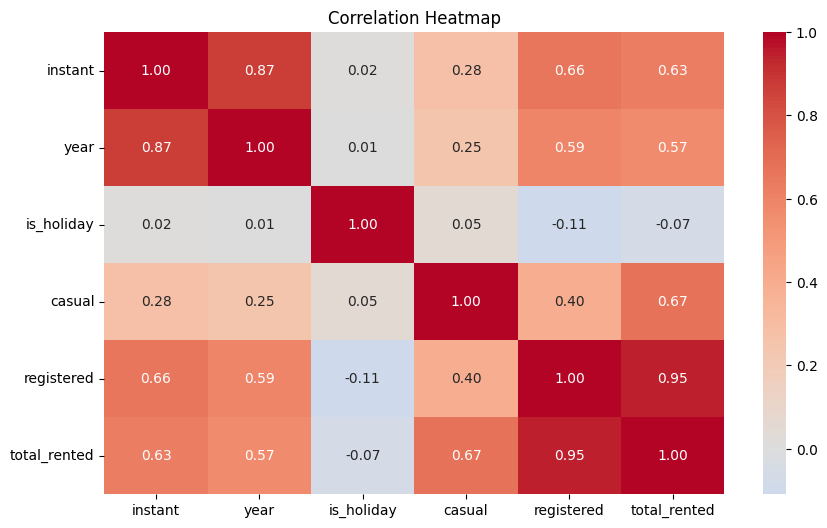

In [21]:
# Visualisasi korelasi data
correlation_matrix = bike_rent_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Notes**:
- Faktor paling berpengaruh terhadap jumlah penyewaan yaitu status penyewa ("registered"), dimana berkorelasi positif atau semakin banyak penyewa terdaftar maka akan semakin banyak juga total penyewaan sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?

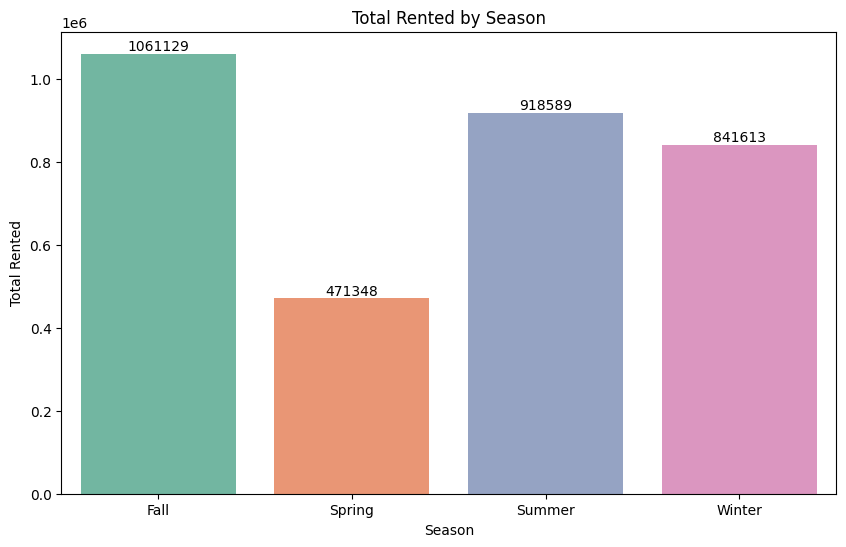

In [27]:
# SUM of Total_rented by season (max & min)
season_total_rented = bike_rent_df.groupby('season')['total_rented'].sum().reset_index()
season_total_rented = season_total_rented.sort_values(by='total_rented', ascending=False)
season_total_rented

# Viz
plt.figure(figsize=(10, 6))
sns.barplot(data=season_total_rented, x='season', y='total_rented', palette='Set2')

# Menambahkan keterangan di atas batang
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.title('Total Rented by Season')
plt.ylabel('Total Rented')
plt.xlabel('Season')
plt.show()

#### Jawaban 1: Penyewaan terbanyak terdapat pada musim **"Fall"** atau Musim Gugur, sedangkan penyewaan paling sedikit terdapat pada musim **"Spring"** atau Musim Semi.

### Pertanyaan 2: Apakah ada perbedaan jumlah penyewa sepeda ketika hari libur dengan tidak?

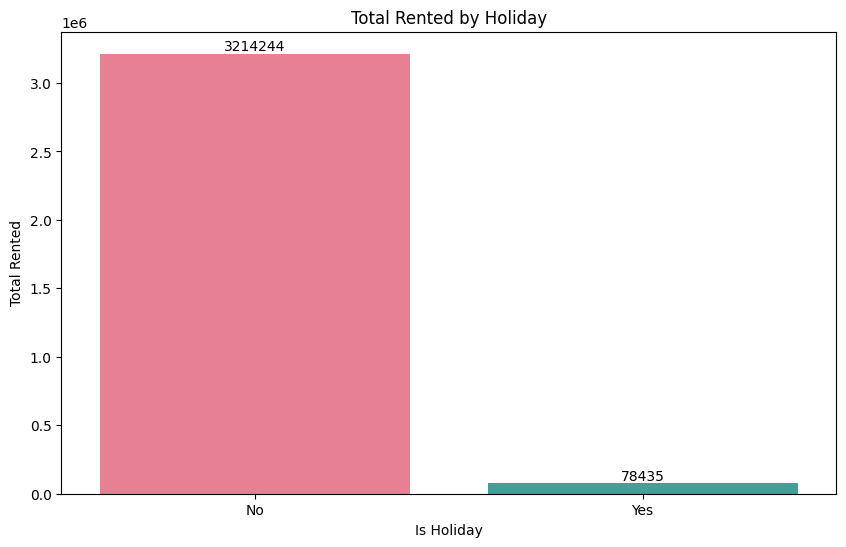

In [32]:
# SUM of Total_rented by is_holiday (max & min)
holiday_total_rented = bike_rent_df.groupby('is_holiday')['total_rented'].sum().reset_index()
holiday_total_rented = holiday_total_rented.sort_values(by='total_rented', ascending=False)

# Viz
plt.figure(figsize=(10, 6))
sns.barplot(data=holiday_total_rented, x='is_holiday', y='total_rented', palette='husl')

# Menambahkan keterangan di atas batang
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.title('Total Rented by Holiday')
plt.ylabel('Total Rented')
plt.xlabel('Is Holiday')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

#### Jawaban 2: Terdapat perbedaan signifikan, yaitu penyewaan banyak terjadi di hari kerja, hari libur tidak berengaruh signifikan terhadap total penyewaan sepeda

### Pertanyaan 3: Bagaimana trend penyewaan sepeda dari tahun 2011 - 2012 per bulannya?

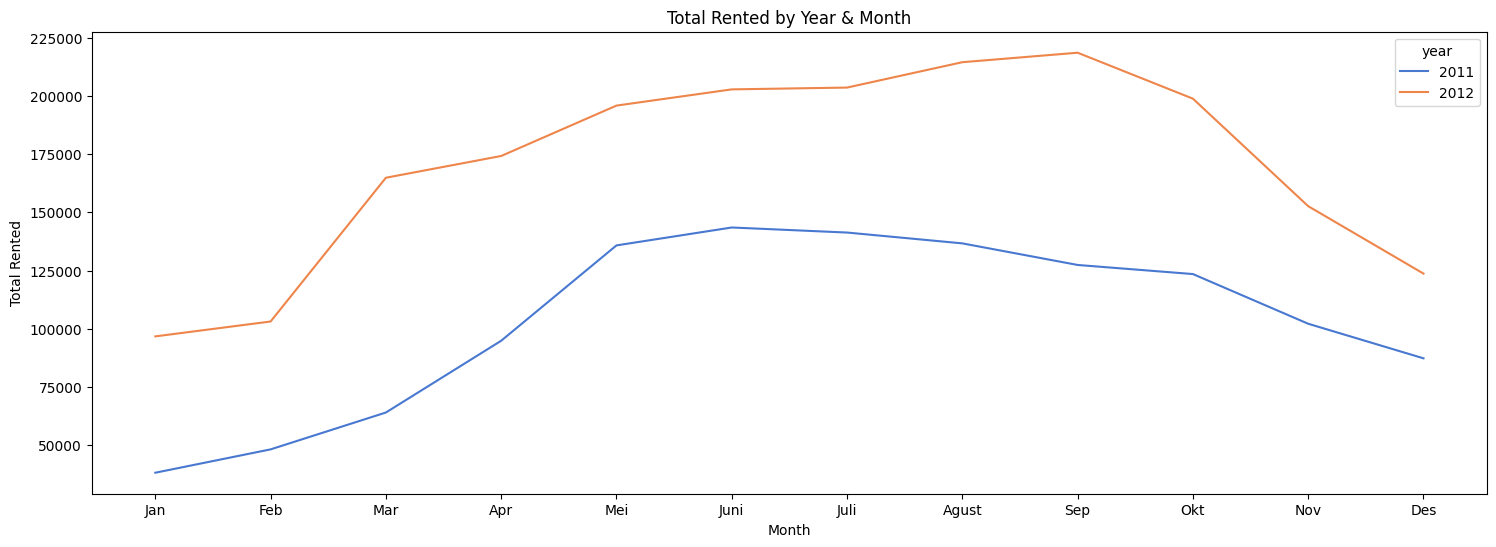

In [42]:
# SUM of Total_rented by year & month
year_month_total_rented = bike_rent_df.groupby(['year', 'month'])['total_rented'].sum().reset_index()
year_month_total_rented['month'] = pd.Categorical(year_month_total_rented['month'], categories=month_order, ordered=True)

# Viz
plt.figure(figsize=(18, 6))
sns.lineplot(data=year_month_total_rented, x='month', y='total_rented', hue='year', palette='muted')

plt.title('Total Rented by Year & Month')
plt.ylabel('Total Rented')
plt.xlabel('Month')
plt.show()

#### Answer 3: Penyewaan pada tahun 2011 dengan 2012 memiliki trend yang sama, yaitu akan meningkat sampai pertengahan tahun dan mengalami penurunan hingga akhir tahun. Namun terdapat peningkatan jumlah penyewaan pada tahun 2012 dibandingkan dengan tahun 2011

### Pertanyaan 4: Bagaimana pengaruh situasi cuaca (weathersit) terhadap jumlah penyewa sepeda baik yang terdaftar maupun tidak?

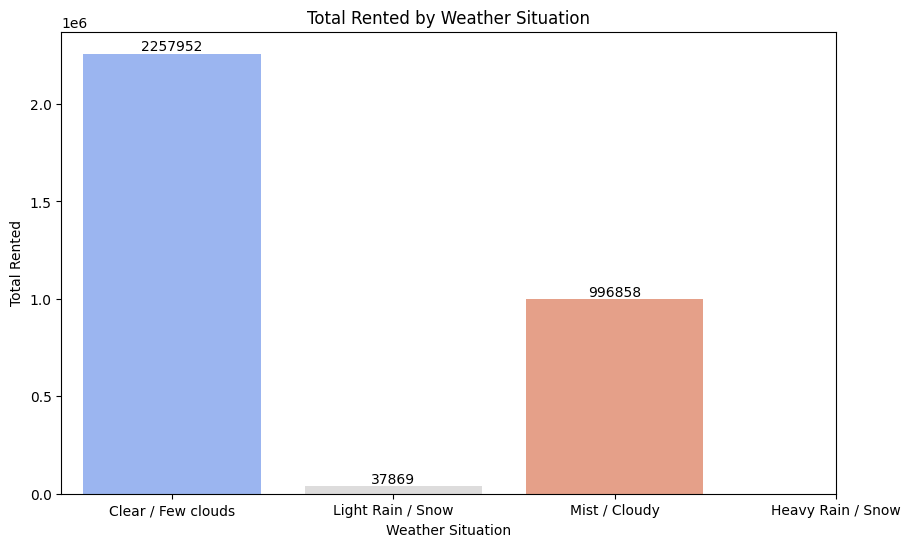

In [38]:
# SUM of Total_rented by weather_situation
weather_total_rented = bike_rent_df.groupby('weather_situation')['total_rented'].sum().reset_index()
weather_total_rented = weather_total_rented.sort_values(by='total_rented', ascending=False)

# Viz
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_total_rented, x='weather_situation', y='total_rented', palette='coolwarm')

# Menambahkan keterangan di atas batang
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.title('Total Rented by Weather Situation')
plt.ylabel('Total Rented')
plt.xlabel('Weather Situation')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear / Few clouds', 'Light Rain / Snow', 'Mist / Cloudy', 'Heavy Rain / Snow'])
plt.show()

#### Answer 4: Penyewaan akan semakin banyak ketika cuaca cerah dan sebaliknya, akan semakin sedikit ketika cuaca mendung atau hujan ringan. Bahkan jika cuaca hujan deras, tidak akan ada penyewa sepeda

### Pertanyaan 5: Berapa jumlah penyewa yang sudah menjadi member (registered) dan berapa yang belum (casual)?

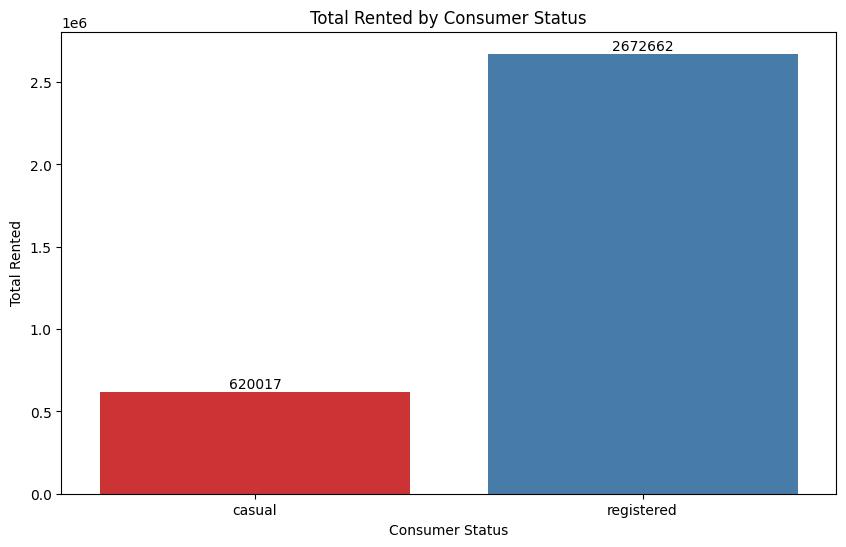

In [40]:
# SUM of casual & registered
casual_registered_total = bike_rent_df[['casual', 'registered']].sum().reset_index()
casual_registered_total.rename(columns={'index': 'consumer', 0: 'total_rented'}, inplace=True)

# Viz
plt.figure(figsize=(10, 6))
sns.barplot(data=casual_registered_total, x='consumer', y='total_rented', palette='Set1')

# Menambahkan keterangan di atas batang
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

plt.title('Total Rented by Consumer Status')
plt.ylabel('Total Rented')
plt.xlabel('Consumer Status')
plt.show()

#### Answer 5: Total penyewa yang sudah terdaftar, jauh lebih banyak dibanding penyewa kasual

## Analisis Lanjutan (Opsional)

### RFM Analysis

RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [54]:
# RFM Analysis
rfm_df = bike_rent_df.groupby(by="month", as_index=False).agg({
    "date": "max",  # last order date
    "instant": "nunique", # order count
    "total_rented" : "sum"  # total order value / revenue
})

rfm_df.columns = ["date", "max_order_timestamp", "frequency", "monetary"]

rfm_df

,date,max_order_timestamp,frequency,monetary
0,Jan,2012-01-31,62,134933
1,Feb,2012-02-29,57,151352
2,Mar,2012-03-31,62,228920
3,Apr,2012-04-30,60,269094
4,Mei,2012-05-31,62,331686
5,Juni,2012-06-30,60,346342
6,Juli,2012-07-31,62,344948
7,Agust,2012-08-31,62,351194
8,Sep,2012-09-30,60,345991
9,Okt,2012-10-31,62,322352


In [57]:
# Hitung transaksi terakhir / recency
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])
bike_rent_df["date"] = pd.to_datetime(bike_rent_df["date"])

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = bike_rent_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df

,date,frequency,monetary,recency
0,Jan,62,134933,335
1,Feb,57,151352,306
2,Mar,62,228920,275
3,Apr,60,269094,245
4,Mei,62,331686,214
5,Juni,60,346342,184
6,Juli,62,344948,153
7,Agust,62,351194,122
8,Sep,60,345991,92
9,Okt,62,322352,61


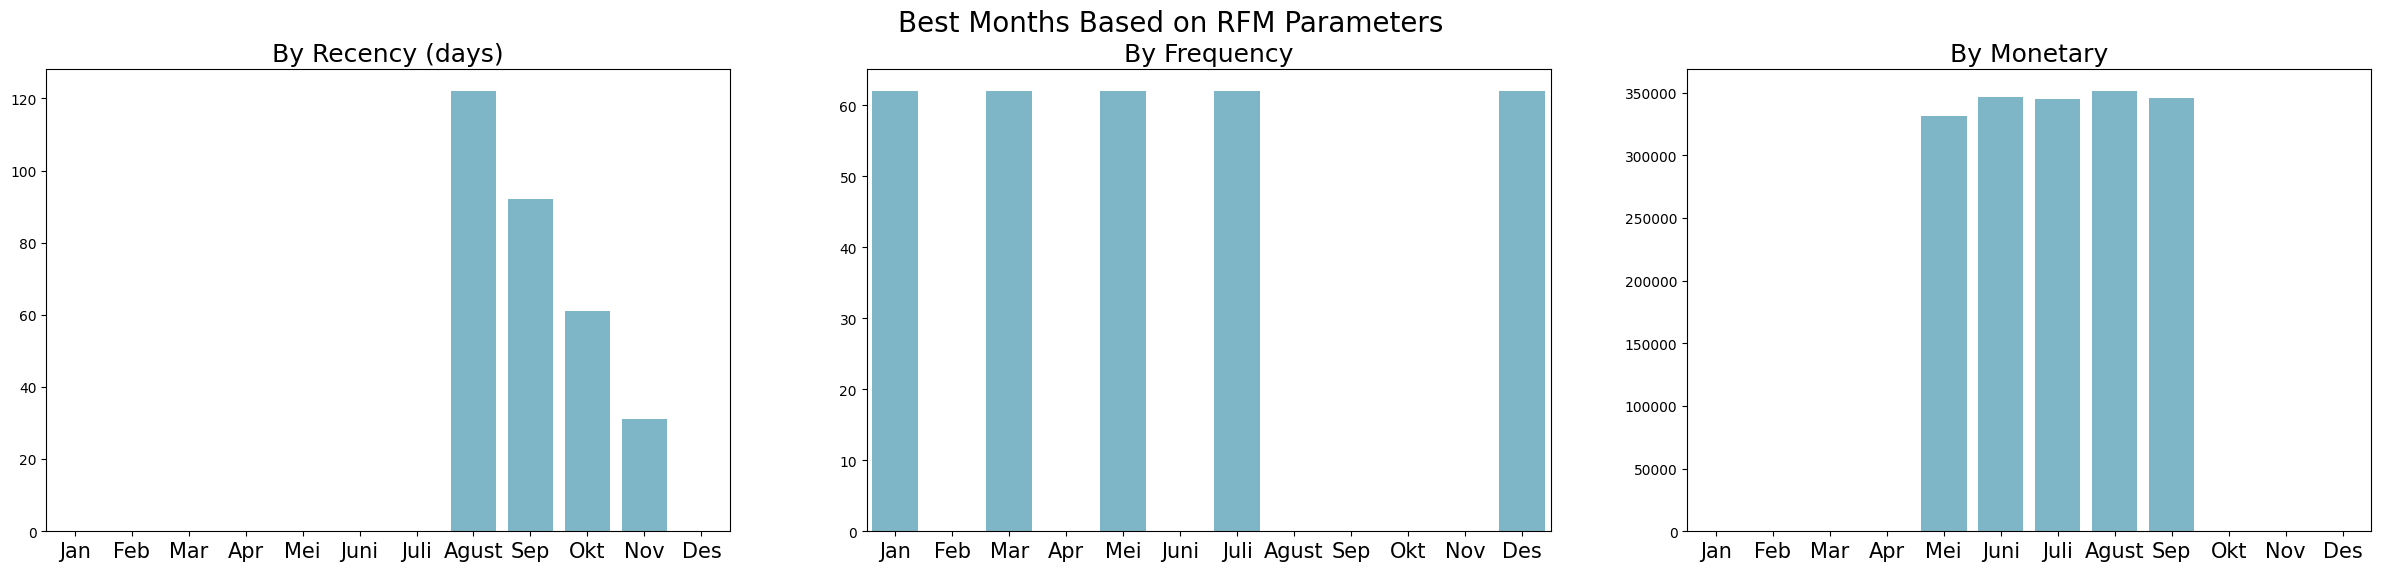

In [66]:
# Viz
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4"]

# Recency (5 terendah)
sns.barplot(y="recency", x="date", data=rfm_df.sort_values(by="recency", ascending=True).head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency (5 tertinggi)
sns.barplot(y="frequency", x="date", data=rfm_df.sort_values(by="frequency", ascending=False).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary (5 tertinggi)
sns.barplot(y="monetary", x="date", data=rfm_df.sort_values(by="monetary", ascending=False).head(), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Months Based on RFM Parameters", fontsize=20)
plt.show()

**Notes:**

**1. Recency:**

- Recency tertinggi pada bulan Januari (335), menunjukkan bahwa pelanggan tidak terlalu aktif atau terjadi penurunan penyewaan di awal tahun

**2. Frequency:**

- Januari dan Maret masing-masing memiliki frekuensi 62 penyewaan. Hal ini menunjukkan bahwa pada bulan ini terdapat tingkat permintaan yang tinggi untuk penyewaan sepeda

**3. Monetary:**
- Mei mencatat nilai moneter tertinggi (331,686) yang menunjukkan bahwa penyewaan sepeda pada bulan tersebut menghasilkan pendapatan yang lebih besar dibandingkan bulan lainnya

## Conclusion

- Penyewaan tertinggi terdapat pada Musim Gugur, sedangkan terendah pada Musim Semi
- Hari libur tidar terlalu berpengaruh pada peningkatan penyewaan sepeda
- Penyewaan sepeda memiliki trend yang sama walaupun terdapat peningkatan total penyewaan pada tahun 2012 dibandingkan dengan tahun 2011
- Kondisi cuaca sangat mempengaruhi jumlah penyewaan, semakin cerah cuacanya maka penyewaan semakin meningkat
- Total penyewa terdaftar jauh melampaui penyewa kasual

#### Save dataset

In [67]:
# Save dataset
bike_rent_df.to_csv('dashboard/bike_rental.csv', index=False)
rfm_df.to_csv('dashboard/rfm_analysis.csv', index=False)